In [153]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Regression

Type of supervised learning that maps continuous inputs to outputs.    

Regression, as a term, stems from the observation that individual instances of any observed attribute tend to *regress* towards the mean. Slope of the line is $2/3$ (regresses to mean).   
    
Regression now refers mostly to function approximation.    

### Linear Regression

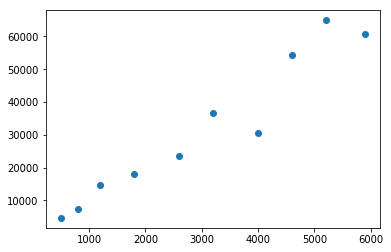

In [213]:
x = np.array([500, 800, 1200, 1800, 2600, 3200, 4000, 4600, 5200, 5900])
# y = X*100*np.random.uniform(0.5, 1.5, len(x))
y = (X*np.random.uniform(0.8, 1.2, len(x)))*10 + (X*np.random.uniform(-0.8, 1, len(x)))
plt.scatter(x, y)
plt.show()

### Find best line  
$y = mx + b$   
### Use a cost function to measure error   
Tells us how well the model is making predictions     
- **Sum of Squared Errors:**  
    - $1/2 \sum_i^n{({\hat y_i} - y_i)^2}$
    - one approach is to minimize sum of squared error (least squared error) 
    - squared error is sum of distances between line and data points  
    - minimize the distance of our line with sample data (dots) to get best fit line.
    - minimize error by using gradient descent   
- **Mean Squared Error** (L2 loss)  
    - $1/N \sum_i^n{({\hat y_i} - y_i)^2}$   
- **Gradient Descent**
    - Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 
    - In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks. [source](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)  
    - Calculate the partial derivatives of the cost function with respect to each parameter
    - Cost function is a function of two parameters, m and b
    - $f(m,b)$ = $1/2 \sum_i^n{((mx_i + b) - y_i)^2}$
    - Partial derivative with respect to m
        - $\frac {\partial}{\partial m}$ = $1/2 \sum_i^n$ $2((mx_i + b) - y_i)$ $x$
        - $\frac {\partial}{\partial m}$ = $\sum_i^n$ $x$ $((mx_i + b) - y_i)$
    - Partial derivative with respect to b
        - $\frac {\partial}{\partial b}$ = $1/2 \sum_i^n$ $2((mx_i + b) - y_i)$ $1$
        - $\frac {\partial}{\partial b}$ = $\sum_i^n$ $((mx_i + b) - y_i)$

m: 11.144421959476707   b: -1669.407434312073


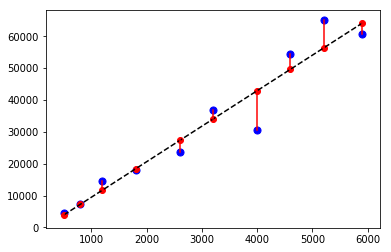

In [214]:
m, b = np.polyfit(x,y,1)
print('m:', m, '  b:', b)
y_pred = m*x + b
plt.scatter(x, y, color='b', s=50)
plt.scatter(x, y_pred, color='r')
plt.plot(x, y_pred, '--k')
for i in range(x.shape[0]):
    plt.plot([x[i],x[i]],[y[i],y_pred[i]],'r-')
plt.show()

Each red line ($d0$, $d1$, ..., $d_n$) represents an error between the actual value and the estimated value.   
D = $d0^2$ + $d1^2$ + ... $d_n^2$   
The best linear model will have the smallest D (sum of squared errors)

### Linear Regression from scratch

In [285]:
def linear_regression(x, y, m_current=0, b_current=0, epochs=10000, learning_rate=0.001):
    for i in range(epochs):
        y_pred = (m_current*x) + b_current
        cost = sum([data**2 for data in (y_pred-y)])/2
        m_gradient = sum(x * (y_pred - y))
        b_gradient = sum(y_pred - y)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

#### With large values the gradient will explode so scale the values.

In [286]:
x_scaled = x/1000
y_scaled = y/1000

In [287]:
m, b, cost = linear_regression(x_scaled, y_scaled)
# slope is same but b needs to be scaled back to original value
b *= 1000
print('m:', m, '  b:', b)

m: 11.144421959467236   b: -1669.4074342742501


m: 11.144421959467236   b: -1669.4074342742501


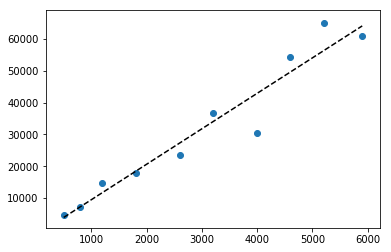

In [288]:
print('m:', m, '  b:', b)
y_pred = m*x + b
plt.plot(x, y_pred, '--k')
plt.scatter(x, y)
plt.show()

In [234]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

# from https://medium.com/@Aj.Cheng/linear-regression-by-gradient-decent-bb198724eb2c

# more resources
# https://github.com/llSourcell/Intro_to_the_Math_of_intelligence
# https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-4-968/
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


## Polynomial regression
---
### Order of polynomial
$f(x) = c_0 + c_1x + c_2x^2 + ... + c_kx^k$     

k=0 : constant   
k=1 : line  
k=2 : parabola

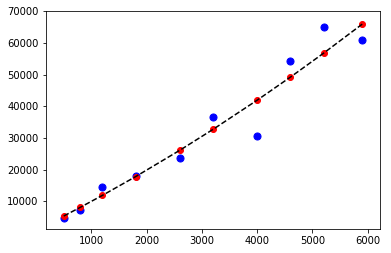

In [221]:
c2, c1, c0 = np.polyfit(x,y,2)
y_pred = c2*(x**2) + c1*x + c0
plt.scatter(x, y, color='b', s=50)
plt.scatter(x, y_pred, color='r')
plt.plot(x, y_pred, '--k')
plt.show()

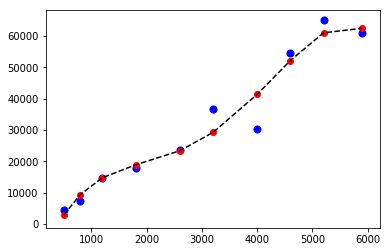

In [223]:
coefs = poly.polyfit(x, y, 4)
ffit = poly.polyval(x, coefs)
plt.scatter(x, y, color='b', s=50)
plt.scatter(x, ffit, color='r')
plt.plot(x, ffit, '--k')
plt.show()

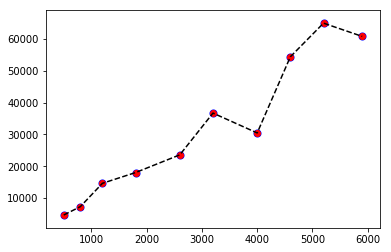

In [222]:
coefs = poly.polyfit(x, y, 9)
ffit = poly.polyval(x, coefs)
plt.scatter(x, y, color='b', s=50)
plt.scatter(x, ffit, color='r')
plt.plot(x, ffit, '--k')
plt.show()

<img src="../images/pr2.png" width=600 align="left"/>  
<img src="../images/pr1.png" width=350 align="right"/>  

### Picking degrees of freedom  
#### Errors
Errors arise in any data set due to multiple areas:  
1. Sensor Error (machines making mistakes interpreting physical world)
2. Unmodeled (unaccounted for) influences (e.g. other processes that have an impact on the data that is not represented in the data)
3. Transcription Error (Humans making mistakes in some part of data wrangling / transformation)
4. Malicious Intent (humans making intentional mistakes)   

The training data has errors.   
**If you pick too high degree polynomial you're not modeling the function, instead function + errors**   

#### Cross validation
- When building a model separate the data into a test and train set   
- Build model with training data (model type, parameters, degrees of freedom are adjusted to "best fit" the data)     
- Test model with testing data (acts as a stand in for what we think we may see in the future)   
- Hold out some training data to validate model before testing   
- Assuming training/test data is represntative of the world
- Independant and identically distributed (IID)
    - each random variable has the same probability distribution as the others and all are mutually independent

#### k-fold cross validation
- Take training data and split into folds (1, 2, 3, 4 for example)   
- Train on 1,2,3 - check using 4  
- Train on 2,3,4 - check using 1  
- Train on 3,4,1 - check using 2  
- Train on 4,1,2 - check using 3  
- Average cross validation errors from all the folds  
- Pick a model pick one with lowest average cross validation error

#### Overfitting and Underfitting
- Bias 
    - Difference between the prediction of the model and the correct value the model is trying to predict. 
    - Model with high bias don't utilize the training data, oversimplify the model and have high error on training and test data.   
- Variance
    - The variability of a model's predictions. 
    - Model with high variance pay too much attention to the training data and don't generalize well on data which it hasn’t seen before.  Believes the training data too much.  
    - Models perform very well on training data but have high error rates on test data.

<img src="../images/overfit_underfit.png" align="left"/>  

<img src="../images/overfit_underfit2.jpeg" width=400 align="left"/>  

    - Underfit 
        - not given enough degree of freedom 
        - too low order polynomial 
        - doesn't model data well  
        - high bias  
    - Overfit 
        - given to many degrees of freedom 
        - too high order polynomial 
        - modeling error not function 
        - generalizes poorly to unseen examples  

<img src="../images/bias_variance.png" align="left"/>    